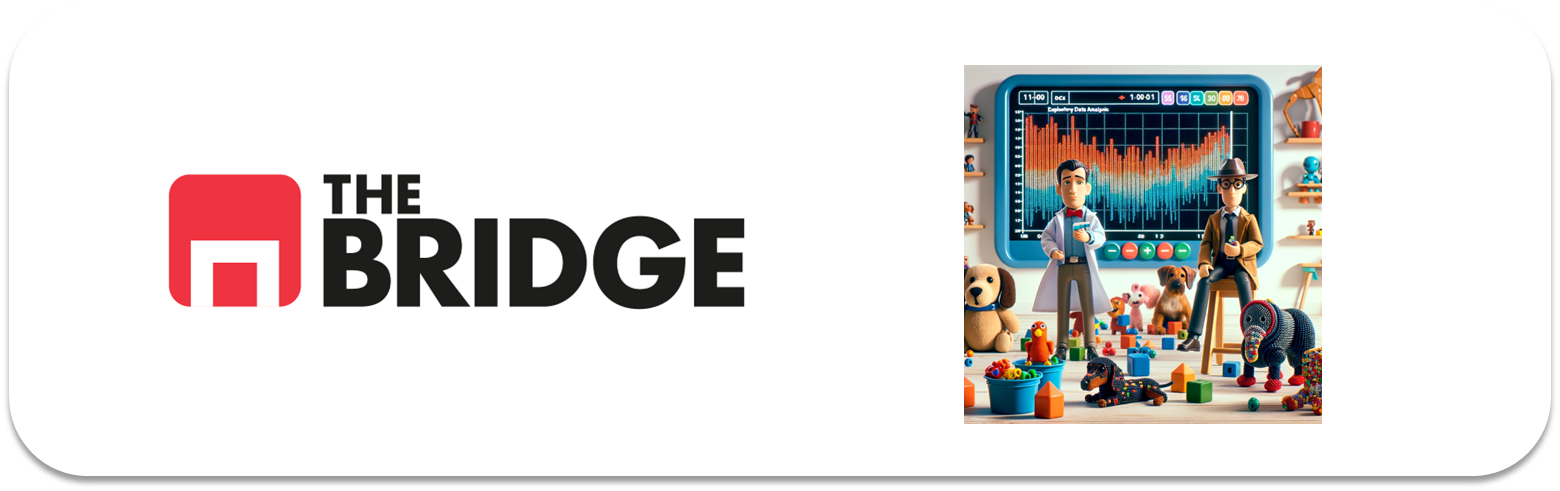

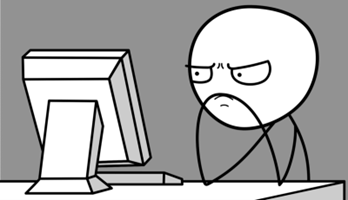

Para ejercitarte y afianzar lo aprendido sobre análisis multivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [99]:
import bootcampviztools as viz
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [100]:
df_1 = pd.read_csv("./data/admission_data.csv")
df_1.drop(columns="Unnamed: 0", inplace=True) #Elimino la columna que contiene los valores del índice
df_1.head(10)

,Year,Major,Gender,Admission
0,1973,School of Medicine,F,Rejected
1,1973,Department of Economics,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
5,1973,Other,M,Rejected
6,1973,Department of Psychology,F,Accepted
7,1973,Other,M,Accepted
8,1973,Other,M,Rejected
9,1973,Department of Physics and Astronomy,M,Accepted


In [101]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       12763 non-null  int64 
 1   Major      12763 non-null  object
 2   Gender     12763 non-null  object
 3   Admission  12763 non-null  object
dtypes: int64(1), object(3)
memory usage: 399.0+ KB


### Ejercicio 2

Realiza los análisis multivariante que consideres necesarios para contestar apoyándote en los datos a las preguntas: ¿Existe algún departamenteo específico donde pudieramos hablar de discriminación?¿Están estos resultados en consonancia con lo obtenido en el análisis bivariante de admisiones y género? 

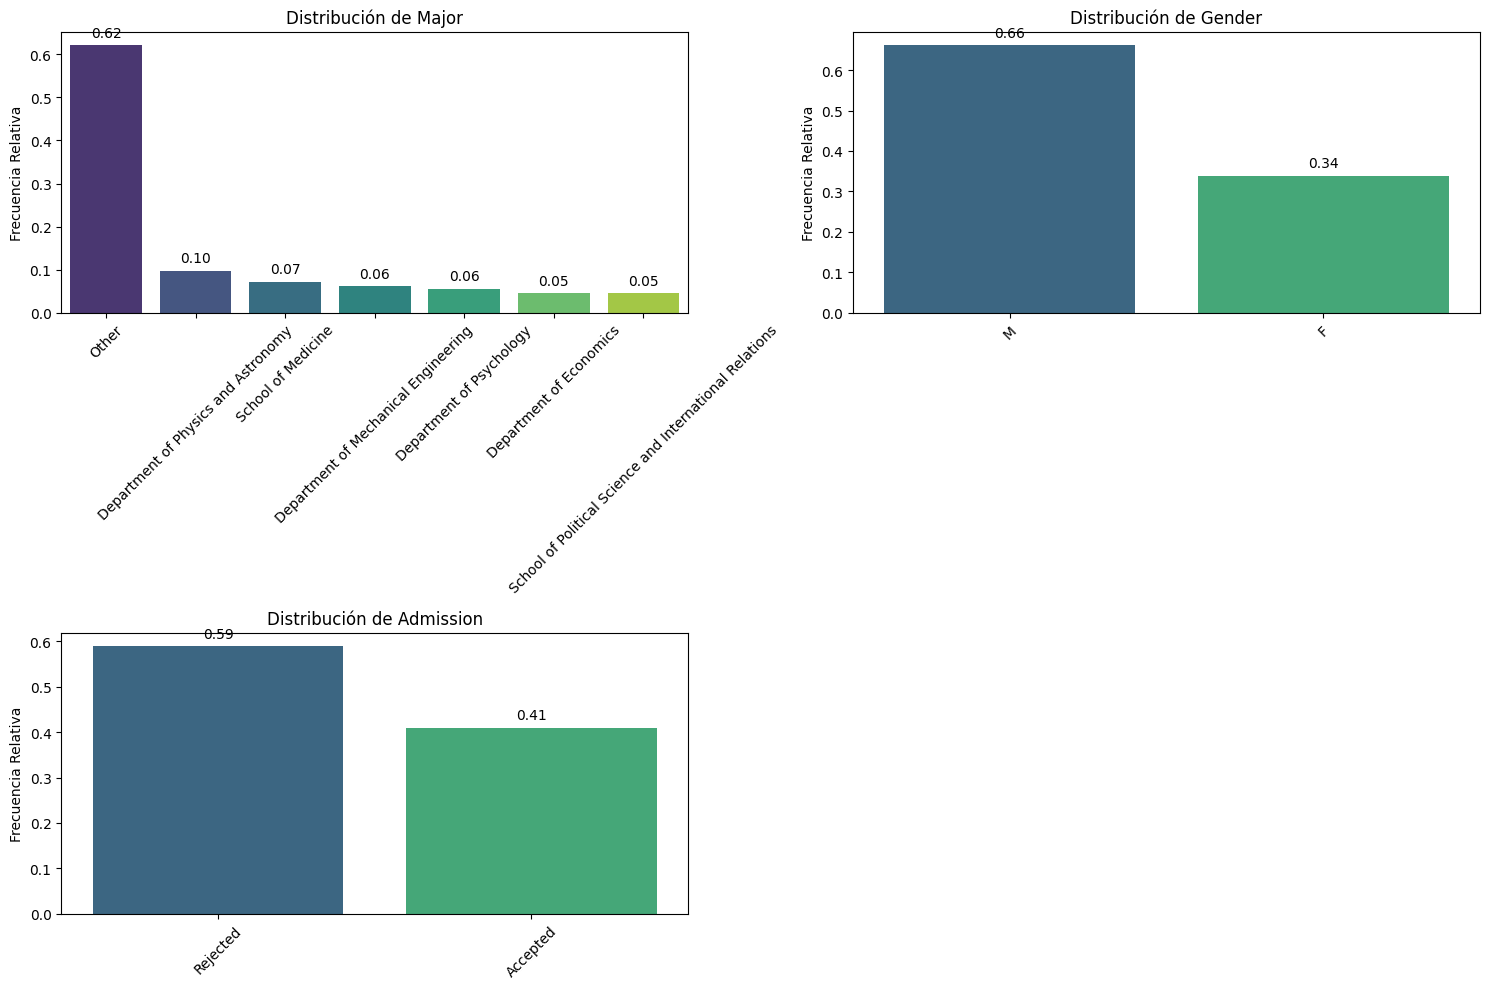

In [102]:
#Realizo el analisis visual univariante para tenerlo de referencia
viz.pinta_distribucion_categoricas(df_1,columnas_categoricas=["Major","Gender","Admission"], relativa=True,mostrar_valores=True)

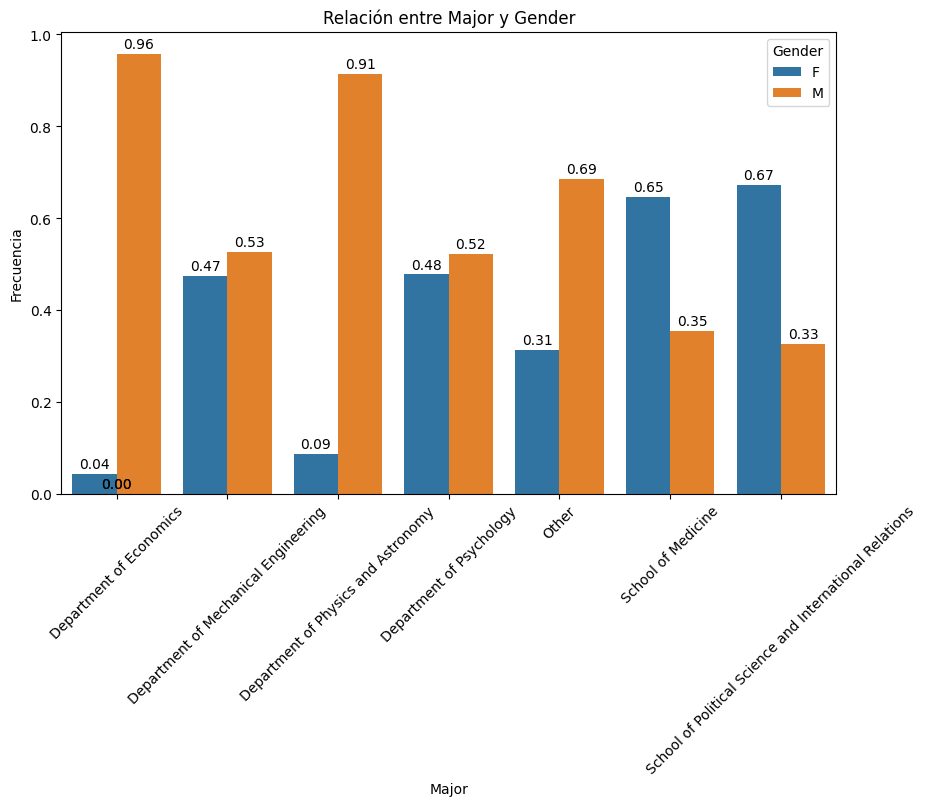

In [103]:
#Realizo el analisis bivariante para tenerlo de referencia
viz.plot_categorical_relationship_fin(df_1, cat_col1="Major",cat_col2="Gender",relative_freq=True, show_values=True, size_group=7)

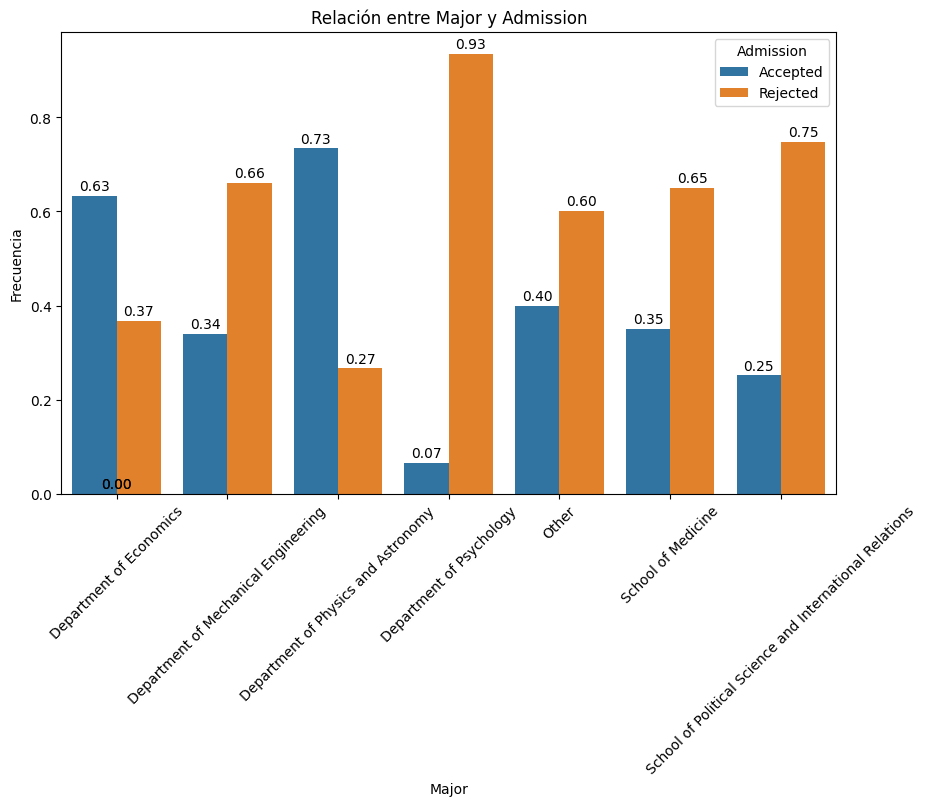

In [104]:
viz.plot_categorical_relationship_fin(df_1, cat_col1="Major",cat_col2="Admission",relative_freq=True, show_values=True, size_group=7)

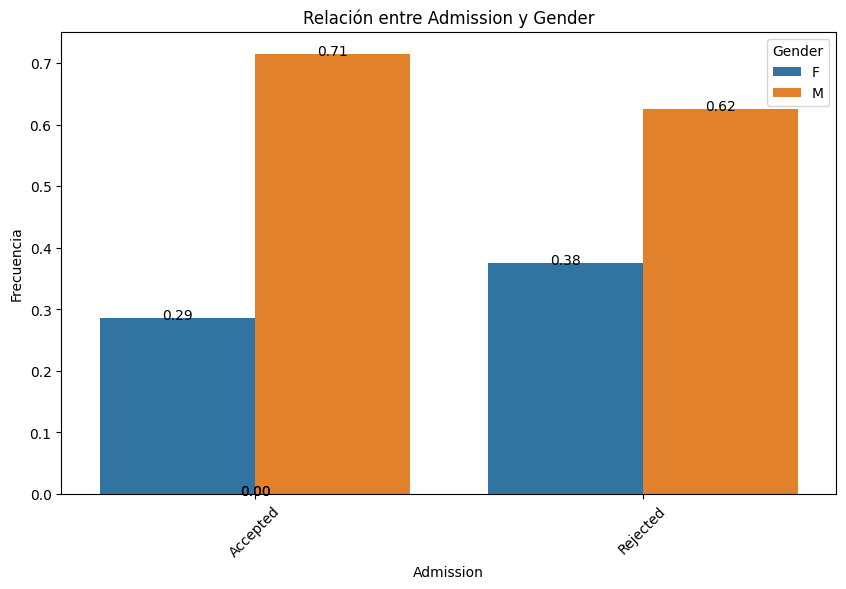

In [105]:
viz.plot_categorical_relationship_fin(df_1, cat_col1="Admission",cat_col2="Gender",relative_freq=True, show_values=True, size_group=2)

In [106]:
#Realizo la division de DataFrames para cada valor de la columna directora
col_directora = "Major"
col_1 = "Gender"
col_2 = "Admission"

diccionario_multivariante = {}

for valor in df_1[col_directora].unique():
    diccionario_multivariante[valor] = df_1.loc[df_1[col_directora] == valor, [col_1,col_2]]

Valor de <Major>: School of Medicine


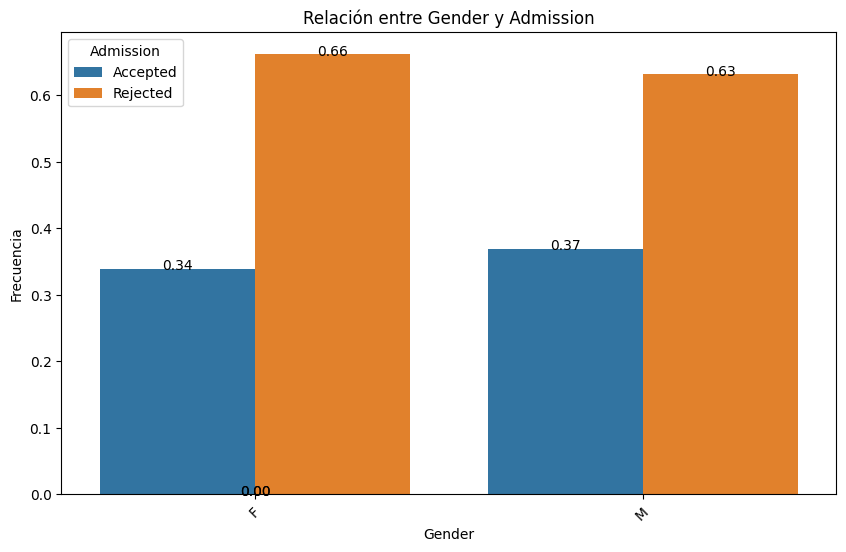

Valor de <Major>: Department of Economics


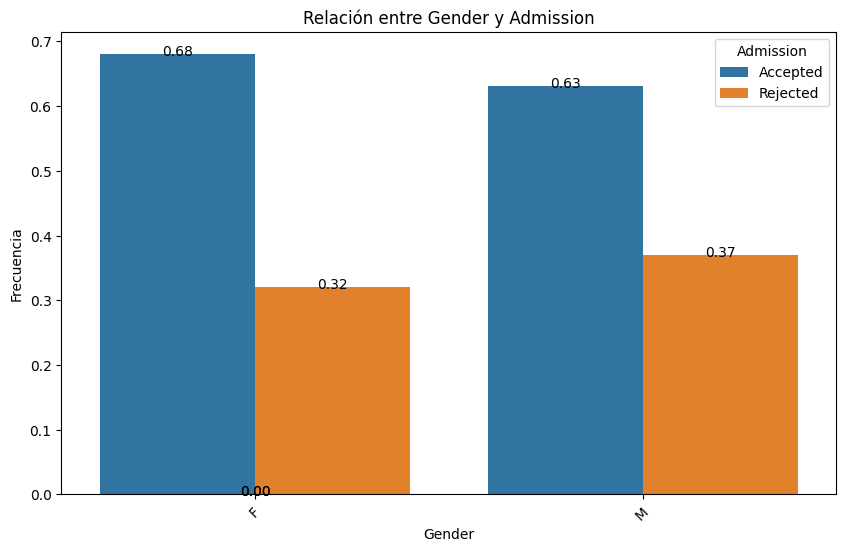

Valor de <Major>: Other


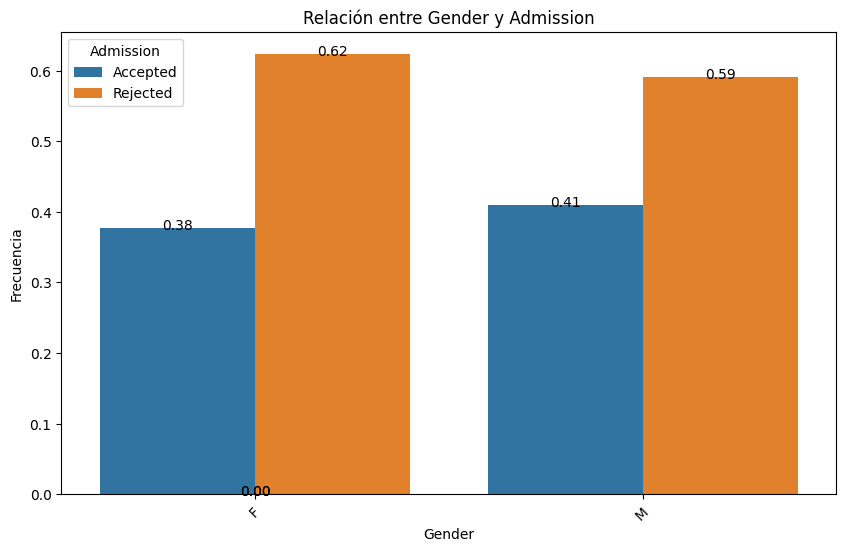

Valor de <Major>: Department of Psychology


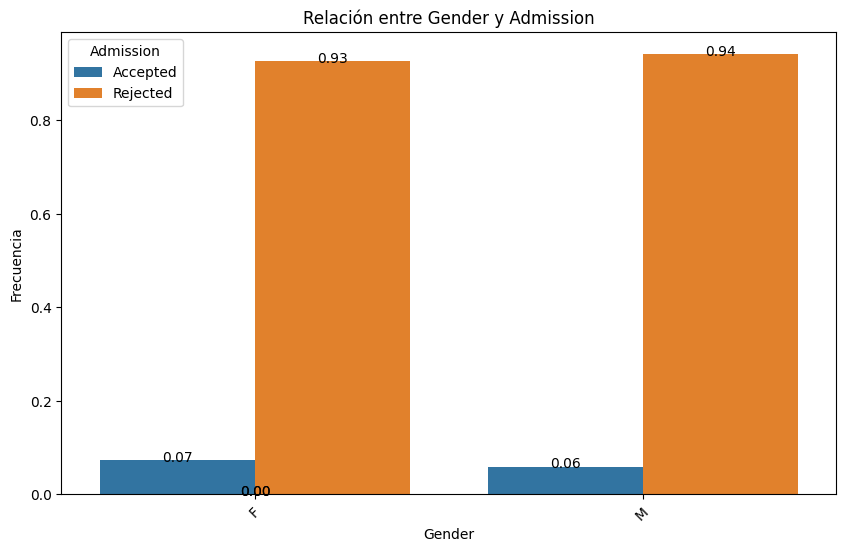

Valor de <Major>: Department of Physics and Astronomy


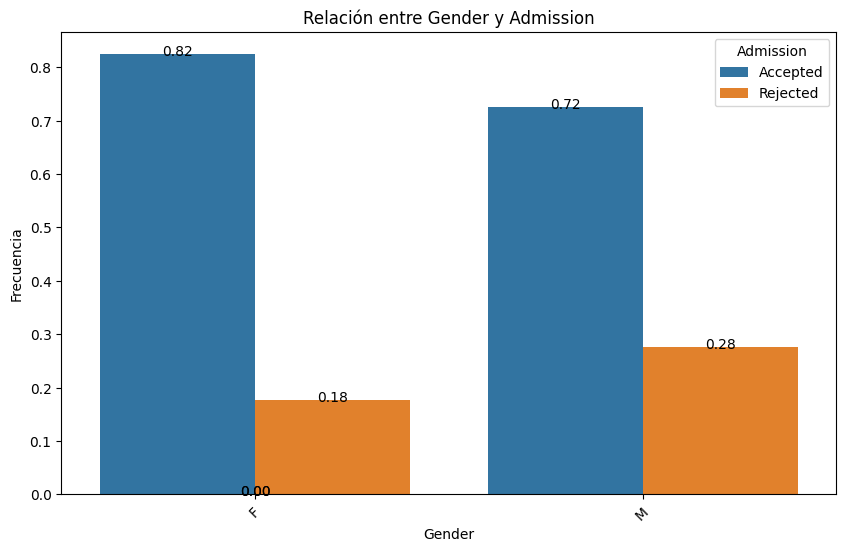

Valor de <Major>: Department of Mechanical Engineering


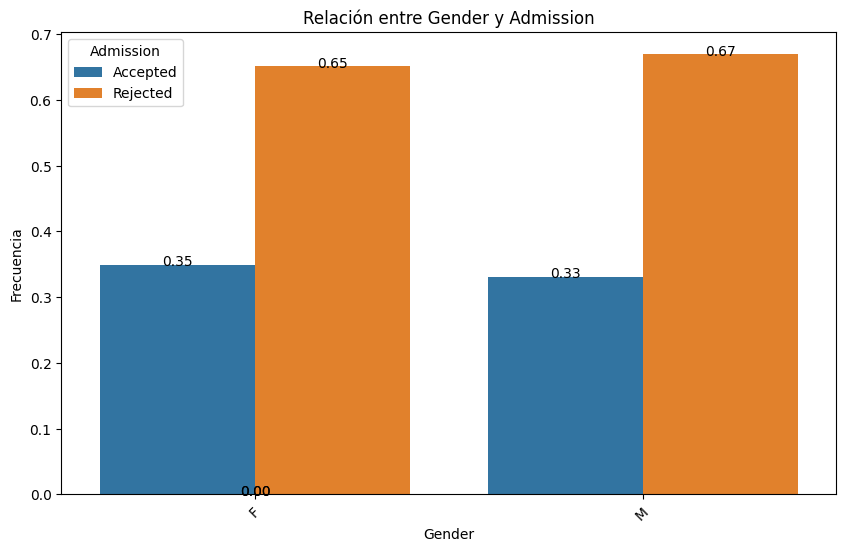

Valor de <Major>: School of Political Science and International Relations


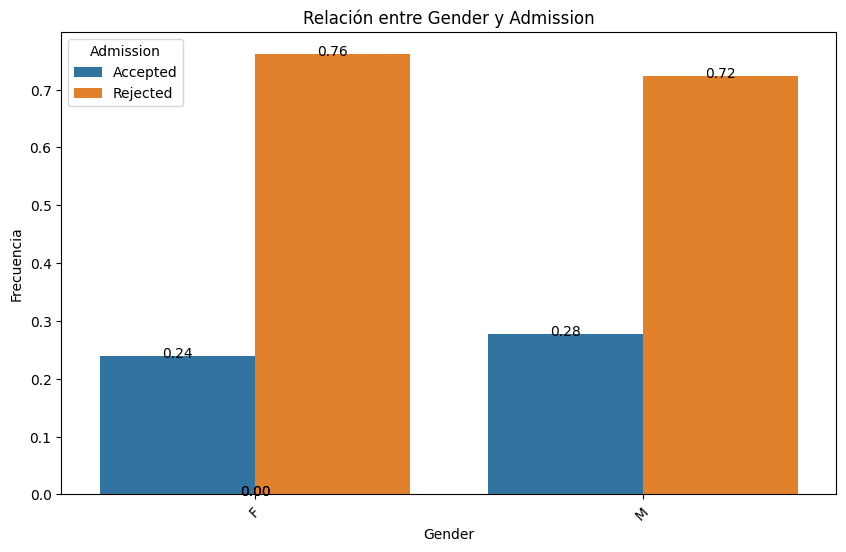

In [107]:
#Realizo el analisis bivariante para cada valor de la columna directora
for valor, df_datos in diccionario_multivariante.items():
    print(f"Valor de <{col_directora}>:", valor)
    viz.plot_categorical_relationship_fin(df_datos, cat_col1=col_1, cat_col2=col_2, relative_freq=True, show_values=True, size_group=2)

* Medicina: Aqui hay una discriminación ligera a favor de los hombres, con una tasa de aceptación-rechazo de 37%-63% frente a la tasa  34%-66% de las mujeres. Ambas son similares a la tasa general del departamento (35%-65%) pero son diferentes respecto a las admisiones en general (41%-59%)

* Economia:  Aqui hay una discriminación ligera a favor de las mujeres, con una tasa de aceptación-rechazo de 68%-32% frente a la tasa 63%-37% de los hombres. Ambas son similares (la de hombres es identica) a la tasa general del departamento (63%-37%) pero son diferentes respecto a las admisiones en general (41%-59%)

* Psicología: Aqui hay una discriminación muy ligera a favor de las mujeres, con una tasa de aceptación-rechazo de 7%-93% frente a la tasa 6%-94% de los hombres. Ambas son similares (la de mujeres identica) a la tasa general del departamento (7%-93%) pero son diferentes respecto a las admisiones en general (41%-59%)

* Física y Astronomia: Aqui hay una discriminación mayor a favor de las mujeres, con una tasa de aceptación-rechazo de 82%-18% frente a la tasa 72%-28% de los hombres. La tasa de mujeres difiere de la tasa general del departamento (73%-27%) y la de hombres es muy similar. Ambas son diferentes respecto a las admisiones en general (41%-59%)

* Ingeniería Mecánica: Aqui hay una discriminación muy ligera a favor de las mujeres, con una tasa de aceptación-rechazo de 35%-65% frente a la tasa 33%-67% de los hombres. Ambas son similares a la tasa general del departamento (34%-66%) pero son diferentes respecto a las admisiones en general (41%-59%)

* Política: Aqui hay una discriminación ligera a favor de los hombres, con una tasa de aceptación-rechazo de 28%-72% frente a la tasa 24%-76% de las mujeres. Ambas son similares a la tasa general del departamento (25%-75%) pero son diferentes respecto a las admisiones en general (41%-59%)

### Ejercicio 3

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [108]:
df_3 = pd.read_csv("./data/tips.csv")
df_3.drop(columns="Unnamed: 0", inplace=True) #Elimino la columna que contiene los valores del índice
df_3.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


### Ejercicio 4

Carga el dataset de accidentes que conoces de la unidad anterior y que se encuentra en la ruta "./data/car_crashes.csv", deshazte de las columnas innecesarias y renombra la que contiene las iniciales de los estados a "state"

In [109]:
df_4 = pd.read_csv("./data/car_crashes.csv", sep="|")
df_4.drop(columns="Unnamed: 0", inplace=True) #Elimino la columna que contiene los valores del índice
df_4.rename(columns={"abbrev":"state"}, inplace = True)
df_4.head(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


### Ejercicio 5

Realiza una análisis de todas las posibles correlaciones dos a dos, de forma numérica primero y luego empleado un heatmap y un pairplot de seaborn. ¿Qué variables tienen o aparentemente tienen una mayor correlación con "total?

In [110]:
#Calculo la matriz de correlacion
corr_matrix = df_4.corr(numeric_only=True) #numeric_only=True para que solo tenga en cuenta columnas numericas
corr_matrix


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


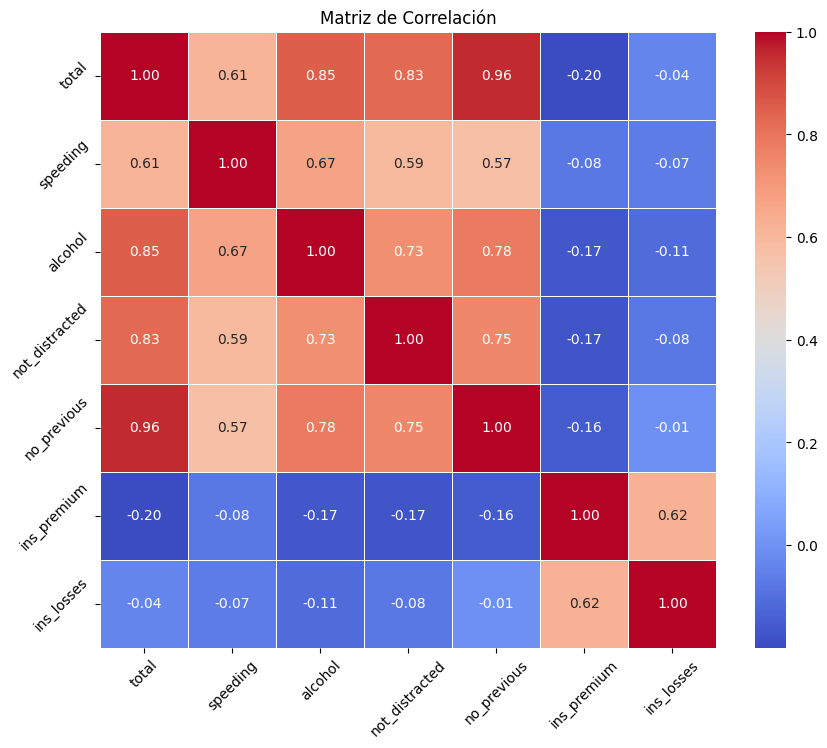

In [111]:
#Muestro el Heatmap
plt.figure(figsize=(10, 8))  #Para ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) #El cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  #Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  #Rota las etiquetas de las y si es necesario

plt.show()

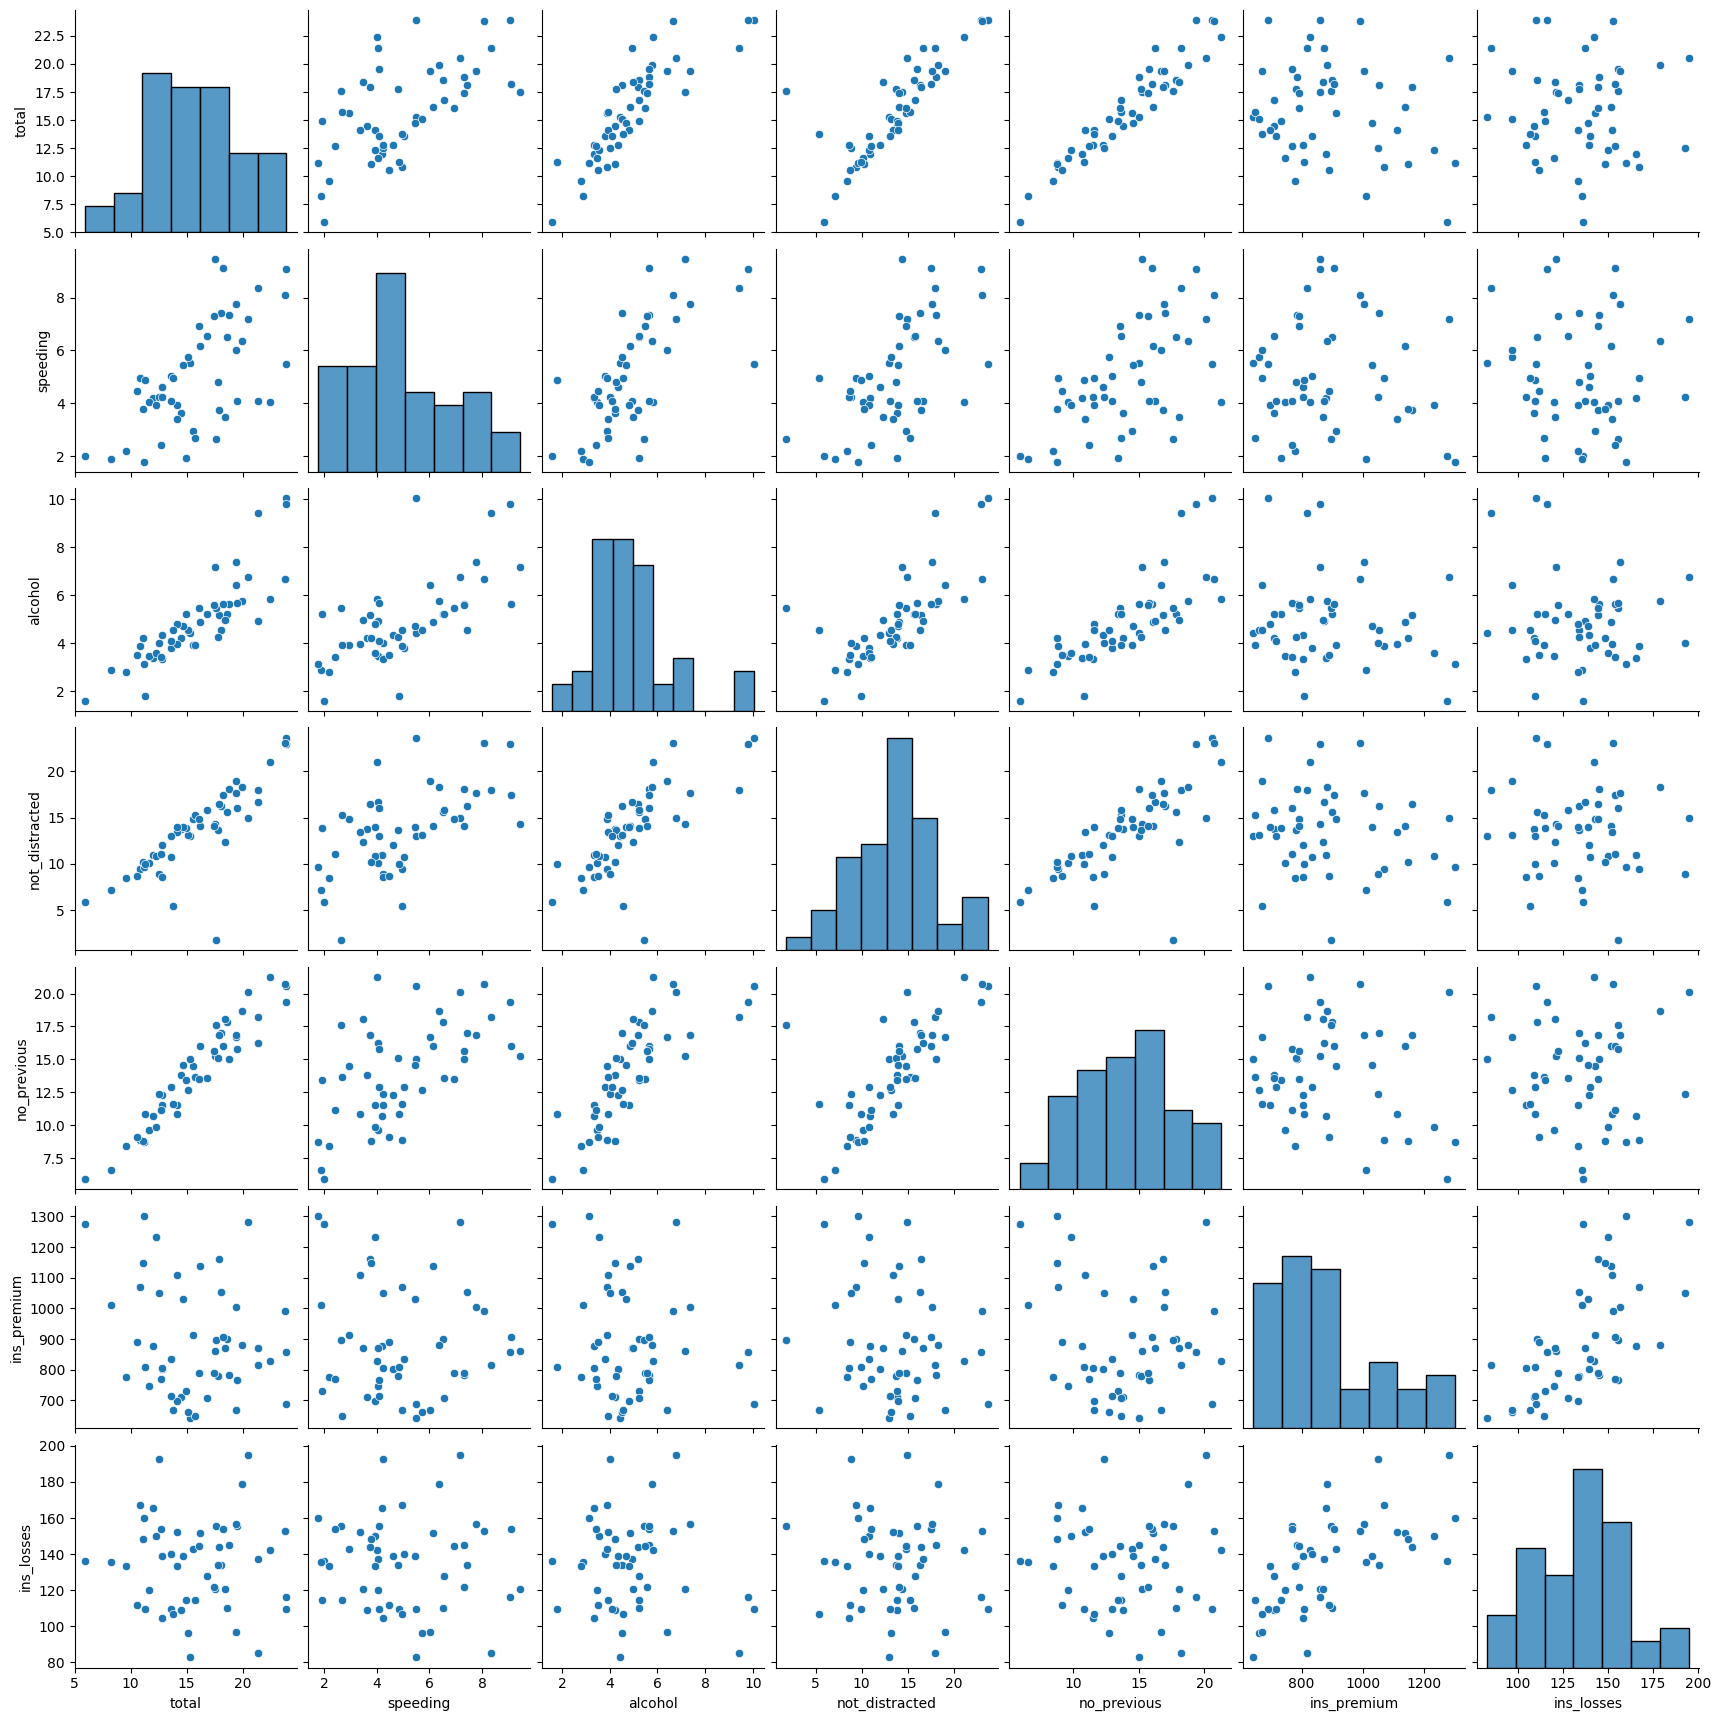

In [112]:
#Muestro el Pairplot
df_4_solo_numeros = df_4.select_dtypes(include = ["float","int"]) #Me quedo solo con las columnas con numeros
sns.pairplot(df_4_solo_numeros)
plt.show()

Las variables que tienen mayor correlación con "total" son, en orden:
1. no_previous (0.96)
2. alcohol (0.85)
3. not_distracted (0.83)
4. speeding (0.61)

### Ejercicio 6

Realiza un análisis multivariante entre las variables numéricas "total", "alcohol", "speeding". ¿Puedes sacar alguna conclusión interesante?

(3, 2)


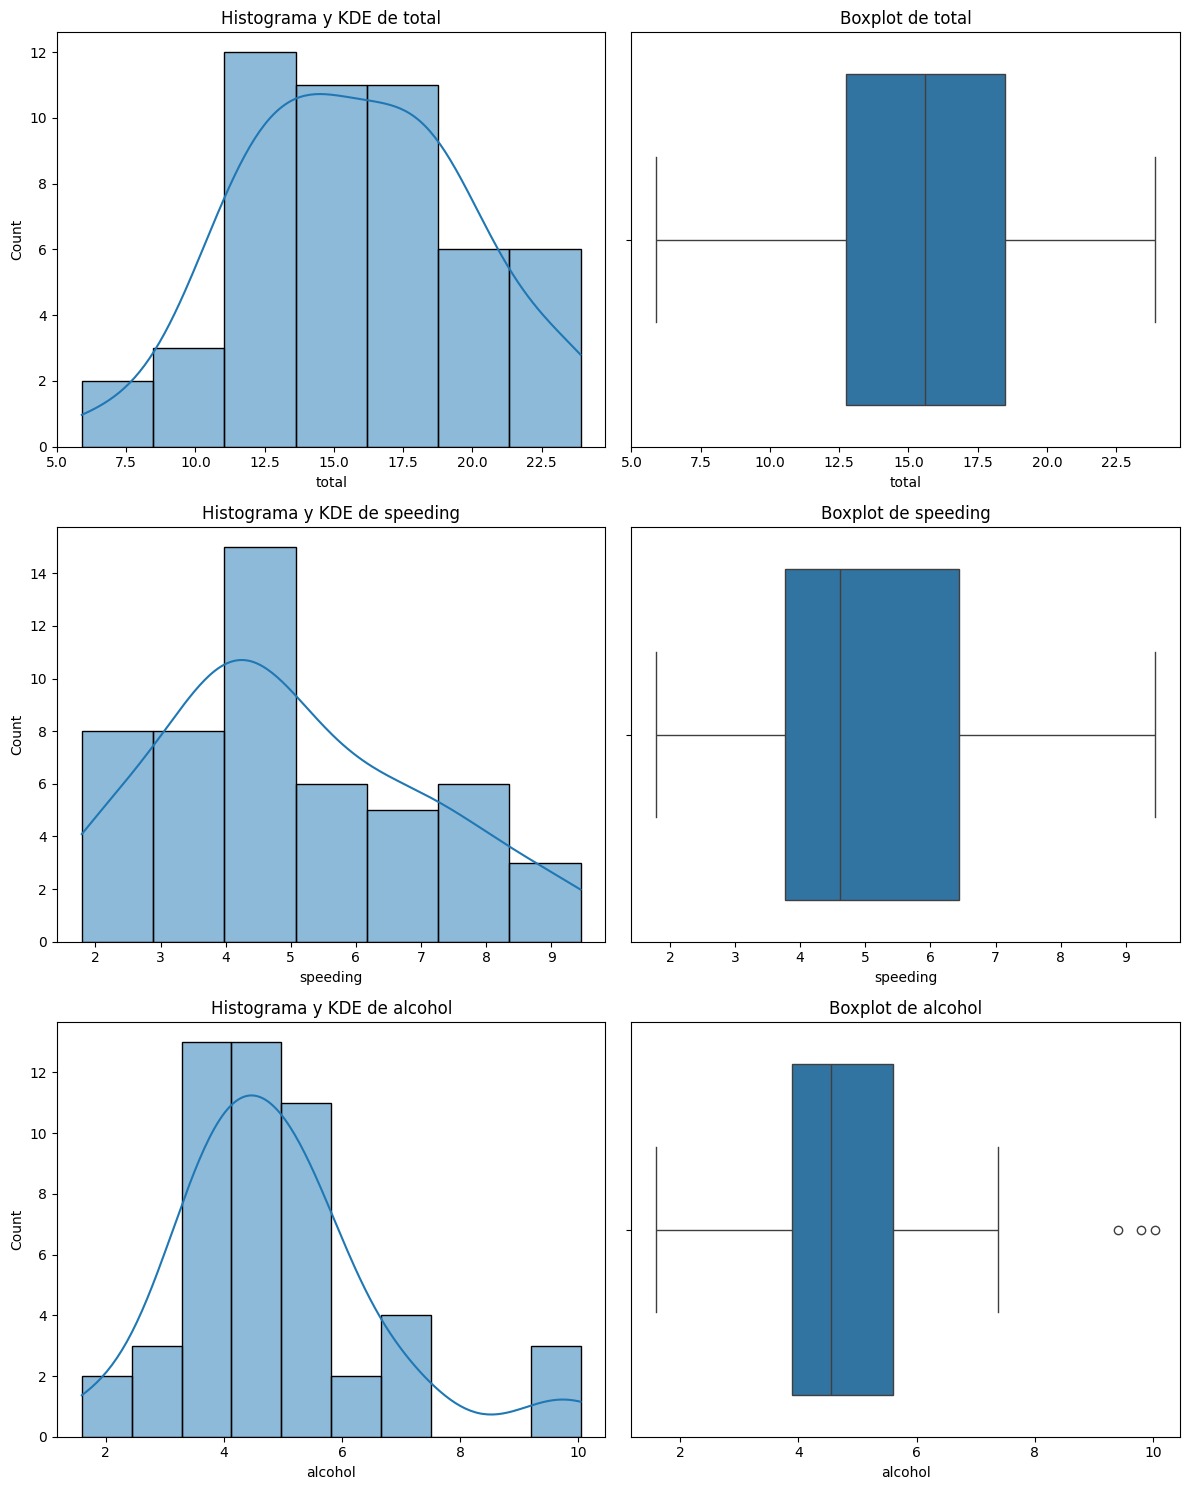

In [113]:
#Muestro los diagramas para tenerlos de referencia

viz.plot_combined_graphs(df_4,columns=["total","speeding","alcohol"], whisker_width=1.5)

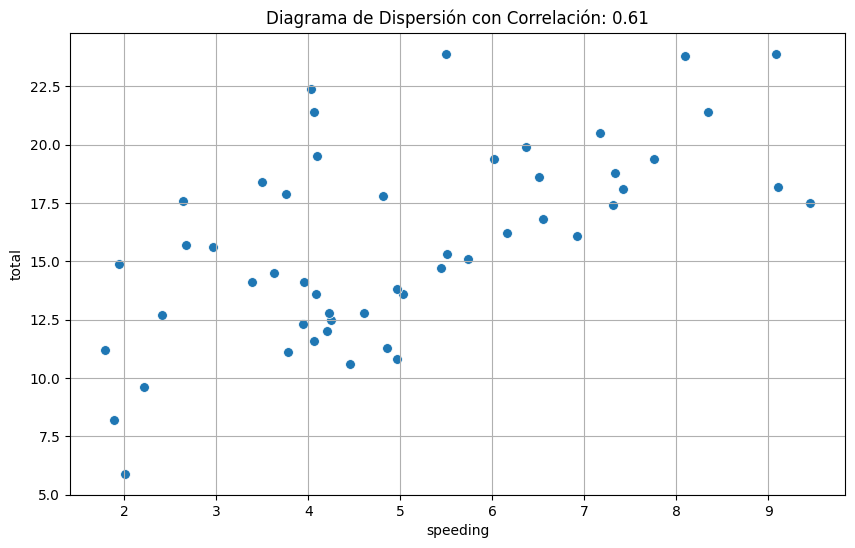

In [114]:
#Muestro los gráficos para el análisis bivariante
viz.grafico_dispersion_con_correlacion(df_4, columna_x="speeding", columna_y="total", mostrar_correlacion= True)

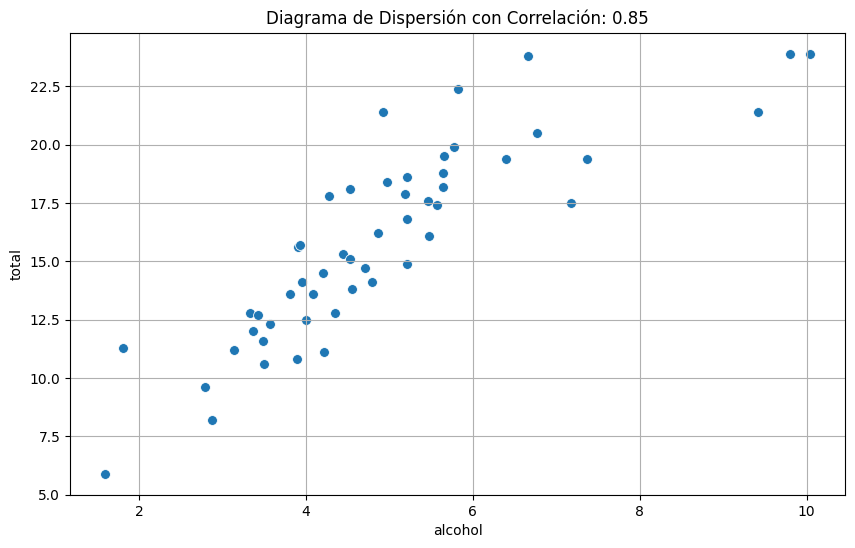

In [115]:
viz.grafico_dispersion_con_correlacion(df_4, columna_x="alcohol",columna_y="total", mostrar_correlacion= True)

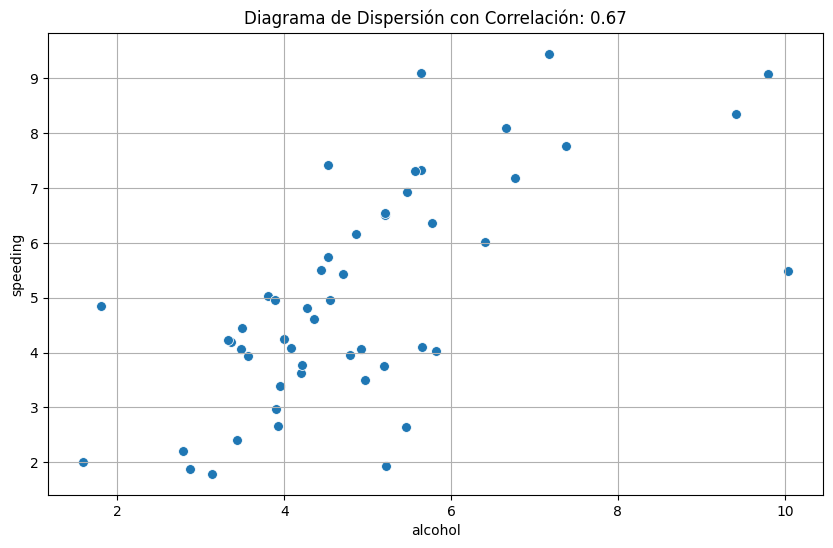

In [116]:
viz.grafico_dispersion_con_correlacion(df_4,columna_x="alcohol", columna_y="speeding", mostrar_correlacion= True)

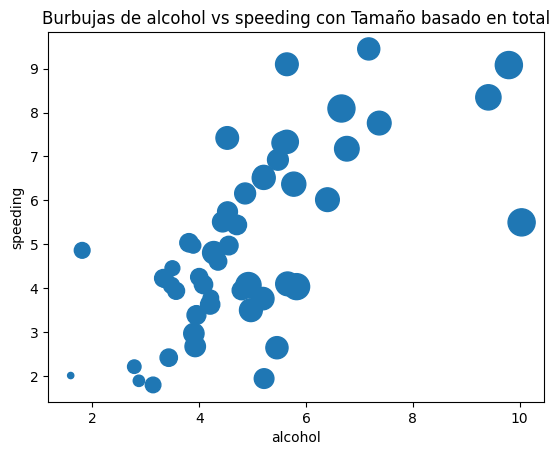

In [117]:
#Muestro el gráfico de burbujas
viz.bubble_plot(df_4,col_x="alcohol", col_y="speeding", col_size="total", scale=0.05)

Es consistente que a medida que aumenten las variables "alcohol" y "speeding" aumente el tamaño de las burbujas (mayor es el valor de la variable "total" que indica el número de accidentes)

No obstante, a destacar son las burbujas grandes de la parte inferior para valores bajos/intermedios de "alcohol" y "speeding" ya que deberian seguir la tendencia del tamaño (número de accidentes) de las burbujas de su zona. Probablemente para esos estados la influencia de las variables "alcohol" y "speeding" no es la misma que para el resto